# Part B

## Load the train and test datasets into pandas dataframes

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
train = pd.read_csv(os.path.join(os.getcwd(),'springleaf\\train2.csv'))

c:\python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
test = pd.read_csv(os.path.join(os.getcwd(),'springleaf\\test2.csv'))

c:\python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Figure out which variables are categorical and which are numeric. Linear models only accept numeric variables. You can either drop the categorical columns OR turn them into numeric variables (one-hot encoding, perturbed rate-by-level, label encoding, BLUP, etc). Many times these columns are very useful and dropping them will hurt your model.

In [4]:
train['group'] = 'train'
test['group'] = 'test'

In [5]:
frame = [train, test]
sample = pd.concat(frame)

In [6]:
sample.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,group,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,998,999999998,998,998,9998,9998,IAPS,train,0.0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,998,999999998,998,998,9998,9998,IAPS,train,0.0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,998,999999998,998,998,9998,9998,IAPS,train,0.0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,998,999999998,998,998,9998,9998,RCC,train,0.0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,998,999999998,998,998,9998,9998,BRANCH,train,1.0


In [7]:
sample.dtypes

ID            int64
VAR_0001     object
VAR_0002      int64
VAR_0003      int64
VAR_0004      int64
VAR_0005     object
VAR_0006    float64
VAR_0007    float64
VAR_0008     object
VAR_0009     object
VAR_0010     object
VAR_0011     object
VAR_0012     object
VAR_0013    float64
VAR_0014    float64
VAR_0015    float64
VAR_0016    float64
VAR_0017    float64
VAR_0018    float64
VAR_0019    float64
VAR_0020    float64
VAR_0021    float64
VAR_0022    float64
VAR_0023    float64
VAR_0024    float64
VAR_0025    float64
VAR_0026    float64
VAR_0027    float64
VAR_0028    float64
VAR_0029    float64
             ...   
VAR_1907      int64
VAR_1908      int64
VAR_1909      int64
VAR_1910      int64
VAR_1911      int64
VAR_1912      int64
VAR_1913      int64
VAR_1914      int64
VAR_1915      int64
VAR_1916      int64
VAR_1917      int64
VAR_1918      int64
VAR_1919      int64
VAR_1920      int64
VAR_1921      int64
VAR_1922      int64
VAR_1923      int64
VAR_1924      int64
VAR_1925      int64


In [8]:
#drop columns that have more than 10% of null values.
sample = sample.dropna(axis = 1, thresh = sample.shape[0]*0.1)

In [9]:
#drop columns of date.
sample = sample.drop(['VAR_0044','VAR_0075','VAR_0204','VAR_0217'], axis = 1)

SyntaxError: invalid syntax (<ipython-input-9-1f517715aaa4>, line 2)

In [10]:
#fill null value with mean for numeric columns
from sklearn.preprocessing import LabelEncoder
for col in sample.columns:
    if sample[col].dtypes in ['int64','float64']:
        sample[col] = sample[col].fillna(sample[col].mean())

In [11]:
#fill null value with mean for categoric columns
drop_list = []
for col in sample.columns:
    if sample[col].dtypes == 'O':
        sample[col] = sample[col].fillna(0)
        le = LabelEncoder()
        try:
            le.fit(sample[col])
        except TypeError:
            drop_list.append(col)
            continue
        sample[col] = le.transform(sample[col])

In [12]:
sample = sample.drop(drop_list, axis = 1)

## Feed your data to sci-kit learn’s Logistic Regression algorithm.

In [14]:
train_data = sample[sample['group'] == 1]
test_data = sample[sample['group'] == 0]

In [15]:
x = list(train_data.columns[1:1889])
X = train_data[x]
Y = train_data['target']

In [16]:
x_test = list(test_data.columns[1:1889])
X_test = test_data[x]
Y_test = test_data['target']

In [17]:
from sklearn import linear_model
# LOAD DATA HERE
#create model object with one hyperparamater set
logreg = linear_model.LogisticRegression(C=1e5)
#Train the model
logreg.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
Y_predict = logreg.predict(X_test)

In [19]:
id = pd.DataFrame(test_data['ID'])
target = pd.DataFrame(Y_predict)

In [20]:
submission = pd.concat([id,target],axis = 1)
submission.columns = ['id','target']
submission.to_csv('submission2.csv',index = False)

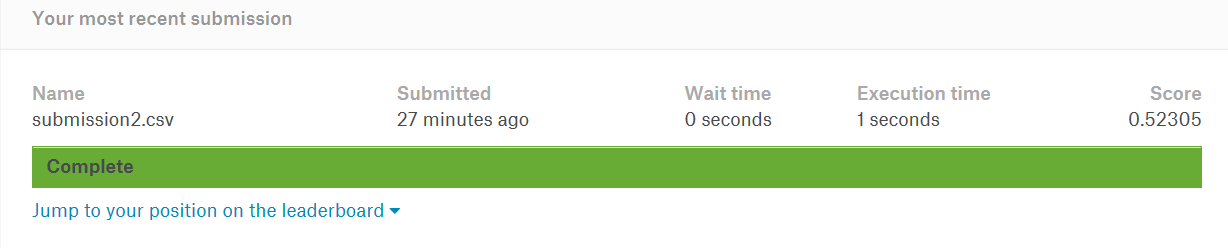